<a href="https://colab.research.google.com/github/keshav211/IITM-Stats/blob/main/Keshav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability in Python

# Importing packages

You can ignore this part for now.

In [74]:
import numpy as np

# Import statistics module
We will use scipy.stats, which has several functions for statistics and probability distributions. 

In [75]:
import scipy.stats as st

# Import pandas, matplotlib

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Fitting a distribution and estimating parameters
The given data are the marks scored by 4500 students,total out of 600 and 

We will use the pandas module in python to read the excel file.

The link for the Excel file(data set): **https://drive.google.com/file/d/1q2z9_GDZn0e-kS0zbIAr4UbLhASinURJ/view?usp=sharing**

In [77]:
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Keshav_choudhary.xlsx') #helps in reading the 
df

,Data
0,518
1,400
2,532
3,546
4,528
...,...
4495,497
4496,529
4497,524
4498,400


We see that there are 3935 samples of data. To get a sense of the distribution, we should plot a histogram.

##Plotting the Histogram

(array([231., 206., 250., 194., 270., 198., 244., 231., 247., 189., 237.,
        207., 241., 218., 210., 214., 245., 200., 229., 239.]),
 array([400. , 407.5, 415. , 422.5, 430. , 437.5, 445. , 452.5, 460. ,
        467.5, 475. , 482.5, 490. , 497.5, 505. , 512.5, 520. , 527.5,
        535. , 542.5, 550. ]),
 <a list of 20 Patch objects>)

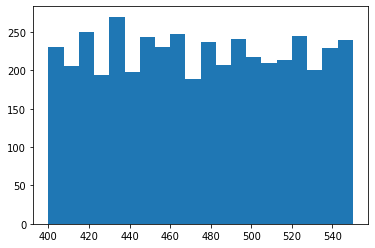

In [78]:
plt.hist(df['Data'],bins=20)

# **Fitting** **a** **Uniform** **distribution**
From the histogram, the distribution could be modelled as Uniform(**$a$**,**$b$**). The next step is to estimate $a$ and $b$ from the given samples.

## **Method** **of** **moments**
Suppose $m_1$ and $m_2$ are the first and second moments of the samples. The method of moments estimates are obtained by solving
$$m_1=\frac{a+b}{2},$$
$$m_2=\frac{a^2 +ab + b^2}{3}.$$
## **The** **solution** **results** **is**
$${a}={m_1-\sqrt{3(m_2 - m_1^2)}}.$$
$${b}={m_1+\sqrt{3(m_2 - m_1^2)}}.$$



> Here $m_1$ is observed to be the $sample$ $mean$ and it can be observed that $\sqrt{(m_2 - m_1^2)}$ is nothing but the $variance$ of the observations.  



In [79]:
x = np.array(df['Data'])
m1 = np.average(x)
ss = np.var(x)
print(m1)
print(ss)


474.5417777777778
1891.7993657283948


In [80]:
a = m1 - (1.73*(ss**0.5))
b = m1 + (1.73*(ss**0.5))
print(a)
print(b)

399.2957391997336
549.787816355822


## **Check to see if the distribution used fit's or not.**

The data generated was generated using python for a range of **400** to **550** hence the value that we get of the estimators fit and the method of moment satisfies our expression.

# **Bootstrap** **Method**

How do we find the bias and variance of the estimator? Theoretical derivations of the sampling distributions may be too cumbersome and difficult in most cases. Bootstrap is a Monte Carlo simulation method for computing metrics such as bias, variance and confidence intervals for estimators.

In the above example, we have found ${a}=399.2957...$ and ${b}=549.7878....$. Using these values, we simulate $n=4500$ *iid* samples from uniform$(399.2957...,549.7878....)$ and, using the simulated samples, we compute new estimates of $a$ and $b$ and call them $\hat{a}$ and $\hat{b}$. Now, repeat the simulation $N$ times to get estimates $\hat{a}_i$ and $\hat{b}_i$, $i=1,2,\ldots,N$.

The sample variance of $\{\hat{a}_1, \hat{a}_2,\ldots,\hat{a}_N\}$ is taken to be the bootstrap estimate for the variance of the estimator.

In [81]:
N = 1000
n = 4500
a1 = np.zeros(N)
b1 = np.zeros(N)
for i in np.arange(N):
  xi = st.uniform.rvs(a,b,size=n)
  m1i = np.average(xi); ssi = np.var(xi) 
  a1[i] = m1i - (1.73*(ssi**0.5)) ; b1[i] = m1 + (1.73*(ssi**0.5))

We can see the histograms of the estimates to get an idea of the spread of the values.

(array([0.01303457, 0.04887962, 0.11649644, 0.18329859, 0.20122112,
        0.1645614 , 0.06109953, 0.01955185, 0.00570262, 0.00081466]),
 array([743.88412863, 745.11163399, 746.33913935, 747.5666447 ,
        748.79415006, 750.02165541, 751.24916077, 752.47666612,
        753.70417148, 754.93167684, 756.15918219]),
 <a list of 10 Patch objects>)

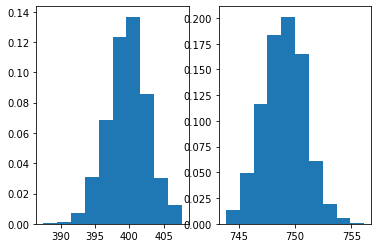

In [82]:
ax1 = plt.subplot(121)
ax1.hist(a1,density=True)
ax2 = plt.subplot(122)
ax2.hist(b1,density=True)

Notice how the histograms look roughly normal.

The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator.

In [83]:
print(np.sqrt(np.var(a1)))
print(np.sqrt(np.var(b1)))

2.9143316573979976
1.86311846775389


# **Confidence** **intervals**
Suppose a parameter $\theta$ is estimated as $\hat{\theta}$, and suppose the distribution of $\hat{\theta}-\theta$ is known. Then, to obtain $(100(1-\alpha))$% confidence intervals (typical values are $\alpha=0.1$ for 90% confidence intervals and $\alpha=0.05$ for 95% confidence intervals), we use the CDF of $\hat{\theta}-\theta$ to obtain $\delta_1$ and $\delta_2$ such that
$$P(\hat{\theta}-\theta\le\delta_1)=1-\frac{a}{2},$$
$$P(\hat{\theta}-\theta\le\delta_2)=\frac{a}{2}.$$
Actually, the inverse of the CDF of $\hat{\theta}-\theta$ is used to find the above $\delta_1$ and $\delta_2$. From the above, we see that
$$P(\hat{\theta}-\theta \le \delta_1)-P(\hat{\theta}-\theta \le \delta_2)= P(\delta_2< \hat{\theta}-\theta \le \delta_1)=1-\frac{a}{2}-\frac{a}{2}=1-a.$$
The above is rewritten as
$$P(\hat{\theta}-\delta_1\le\theta<\hat{\theta}-\delta_2)=1-a,$$
and $[\hat{\theta}-\delta_1,\hat{\theta}-\delta_2]$ is interpreted as the $100(1-a)$% confidence interval.

## Bootstrap confidence intervals for **a**
The CDF of $\hat{\theta}-\theta$ might be difficult to determine in many cases, and the bootstrap method is used often to estimate $\delta_1$ and $\delta_2$. We consider the list of numbers $\{\hat{a_1}-399.2957...,\ldots,\hat{a}_N-399.2957...\}$ and pick the $100(a)$-th percentile and $100(1-a)$-th percentile.

In [84]:
del1 = np.percentile(a1 - a, 97.5)
del2 = np.percentile(a1 -a, 2.5)
print([del1,del2])

[6.2922456786593415, -5.451397825450704]


The 95% confidence interval for **$a$** using the method of moments estimator works out to $[(399.2957-6.49625),(399.2957-(-5.0227))]=[392.7995,404.3184]$.



## It can be clearly observed that the confidence interval that we get for $a$ stands up to the mark and is satisfactory.


#**Maximum** **likelihood** **method**
We now turn to the maximum likelihood estimator for  $a$  and  $b$.


First, $a≤min(X1,…,Xn)$ and $b≥max(X1,…,Xn)$

That is because otherwise we wouldn't be able to have the samples $X_i$ which are less than $a$ or greater than $b$ because the distribution is

$X_i$ ∼ $Unif(a,b)$

and the minimum value $X_i$ can have is a, and the maximum value $X_i$ can have is $b$.

The likelihood function is

$$L(a,b)=\prod_{i=1}^nf(x_i;a,b)={\prod_{i=0}^n \frac{1}{(b−a)}}=\frac{1}{(b−a)^n}$$

Consider the log-likelihood function

$$logL(a,b)=log{\prod_{i=0}^n}f(xi;a,b)=log{\prod_{i=0}^n}\frac{1}{(b−a)^n}=log((b−a)−n)=−n⋅log(b−a)$$

Note that we are looking for the arguments a and b that maximizes the likelihood (or the log-likelihood)

Now, to find $\hat{a}_{MLE}$ and $\hat{b}_{MLE}$ take the log-likelihood function derivatives with respect to a and b

$$\frac{∂}{∂a}logL(a,b)=\frac{n}{(b−a)}$$
$$\frac{∂}{∂b}logL(a,b)=\frac{−n}{(b−a)}$$

We can see that the derivative with respect to a is monotonically increasing, So we take the largest a possible which is
$$\hat{a}_{MLE} = min(X1,...,Xn)$$

We can also see that the derivative with respect to b is monotonically decreasing, so we take the smallest b possible which is
$$\hat{b}_{MLE} = max(X1,...,Xn)$$
**The following method can we calculated manually for a uniform distribution as we have already estimated the max and min value of the random variable and with n being know we get that the likewise estimators also have same value as that of the above estimators.**